<h1>Gradient Boosting Tree</h1>
<br>In this notebook, we will construct a Gradient Boosting Tree ML Model to help us classify a salary class based on our features.

<b>Importing of essential libraries</b>

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import xgboost as xgb
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
sb.set(font_scale=2)

<b>Importing train and test datasets</b>

In [173]:
x_train = pd.read_csv('Data/x_train.csv')
y_train = pd.read_csv('Data/y_train.csv')

x_test = pd.read_csv('Data/x_test.csv')
y_test = pd.read_csv('Data/y_test.csv')

<b>Creating a Base Model with 300 trees that samples 70% of data for each tree and max_depth=3</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.6171789347371469
F1 Score for Test Data: 0.5737292592998751


<AxesSubplot:>

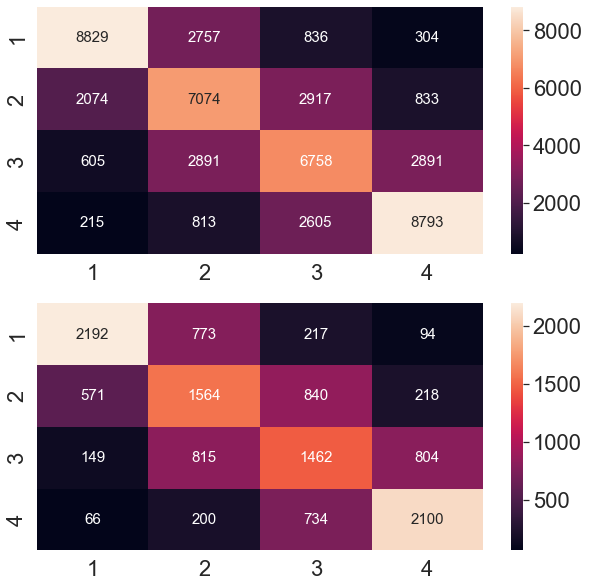

In [174]:
boostTree = xgb.XGBClassifier(n_estimators=300, subsample=0.7, max_depth=3, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Insights</b>
<br>We see that gradient boosting classifier does appear to perform better than decision tree classifier. We will further tune our model's hyperparameters to improve the model performance.

<h3>Hyperparameters Tuning</h3>

For our model, we can tune the number of trees <b>(n_estimators)</b>, sample size for each tree <b>(subsample)</b> and max_depth of each tree <b>(max_depth)</b>. However, we understand that decreasing subsample will require us to increase n_estimators to prevent underfitting. Hence, we will focus on tuning the max_depth.

<b>Classifier with n_estimators: 300, subsample: 0.7, max_depth: 2</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.5879583354767656
F1 Score for Test Data: 0.5703765072350692


<AxesSubplot:>

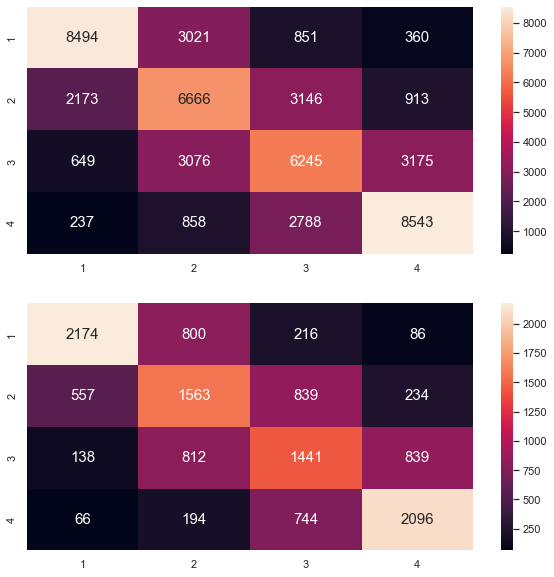

In [48]:
boostTree = xgb.XGBClassifier(n_estimators=300, subsample=0.7, max_depth=2, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Classifier with n_estimators: 300, subsample: 0.7, max_depth: 4</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.6587844507424236
F1 Score for Test Data: 0.5698709016357433


<AxesSubplot:>

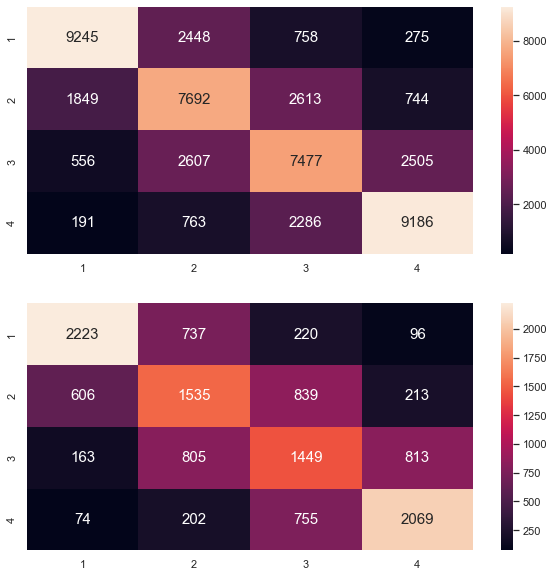

In [49]:
boostTree = boostTree = xgb.XGBClassifier(n_estimators=300, subsample=0.7, max_depth=4, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Classifier with n_estimators: 300, subsample: 0.7, max_depth: 5</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.7180331598812941
F1 Score for Test Data: 0.5664315244150802


<AxesSubplot:>

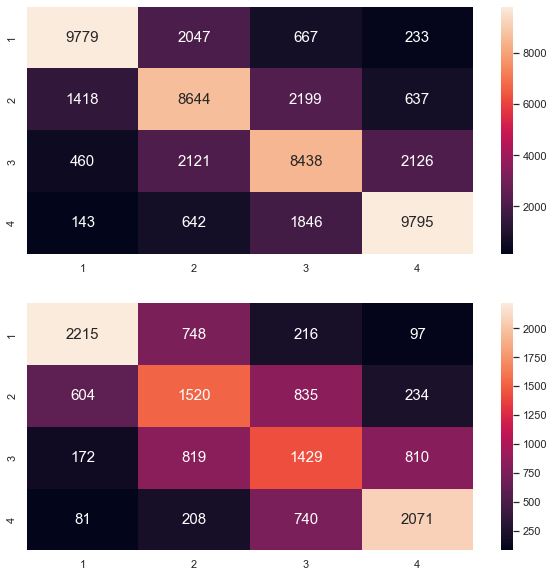

In [50]:
boostTree = xgb.XGBClassifier(n_estimators=300, subsample=0.7, max_depth=5, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Classifier with n_estimators: 400, subsample: 0.7, max_depth: 2</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.5922353422192014
F1 Score for Test Data: 0.5716576227263567


<AxesSubplot:>

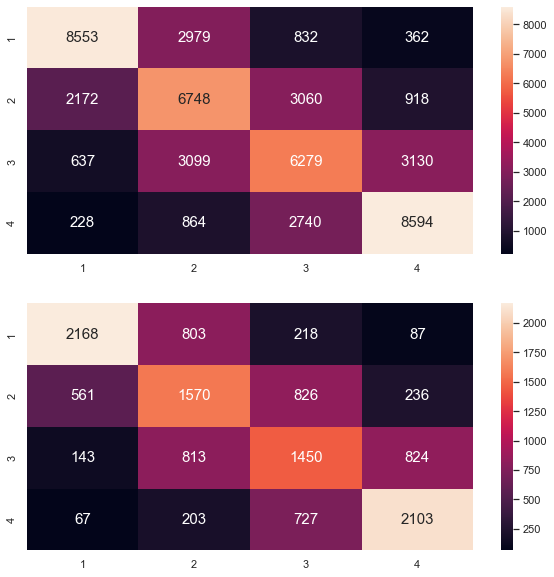

In [51]:
boostTree = xgb.XGBClassifier(n_estimators=400, subsample=0.7, max_depth=2, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Classifier with n_estimators: 400, subsample: 0.7, max_depth: 3</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.6260186015211842
F1 Score for Test Data: 0.570714021557459


<AxesSubplot:>

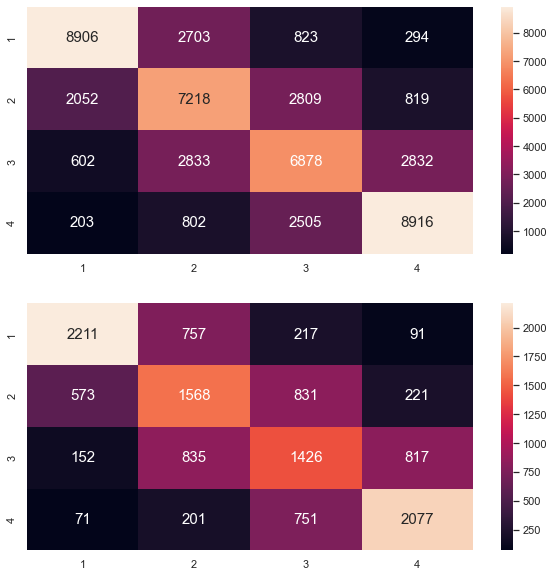

In [52]:
boostTree = xgb.XGBClassifier(n_estimators=400, subsample=0.7, max_depth=3, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Classifier with n_estimators: 400, subsample: 0.7, max_depth: 4</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.6751809239883098
F1 Score for Test Data: 0.5681471683581467


<AxesSubplot:>

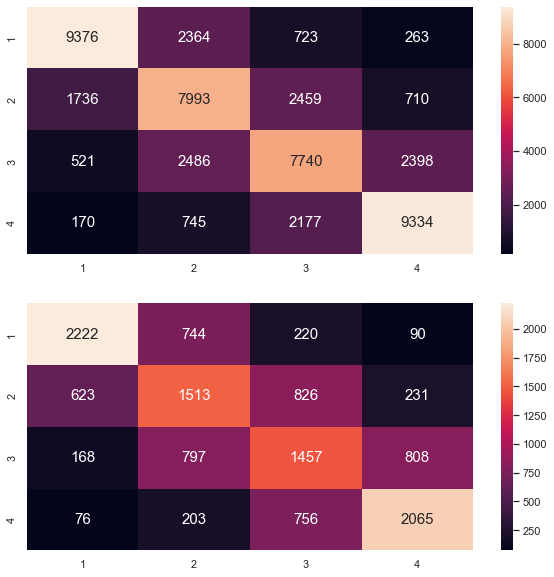

In [53]:
boostTree = xgb.XGBClassifier(n_estimators=400, subsample=0.7, max_depth=4, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Classifier with n_estimators: 400, subsample: 0.7, max_depth: 5</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.7441031570313119
F1 Score for Test Data: 0.5637920557723598


<AxesSubplot:>

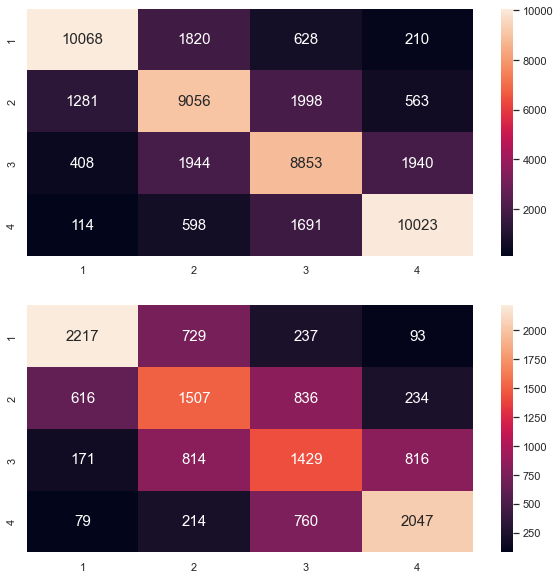

In [54]:
boostTree = xgb.XGBClassifier(n_estimators=400, subsample=0.7, max_depth=5, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Classifier with n_estimators: 500, subsample: 0.7, max_depth: 2</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.5965804108608364
F1 Score for Test Data: 0.5723390183676613


<AxesSubplot:>

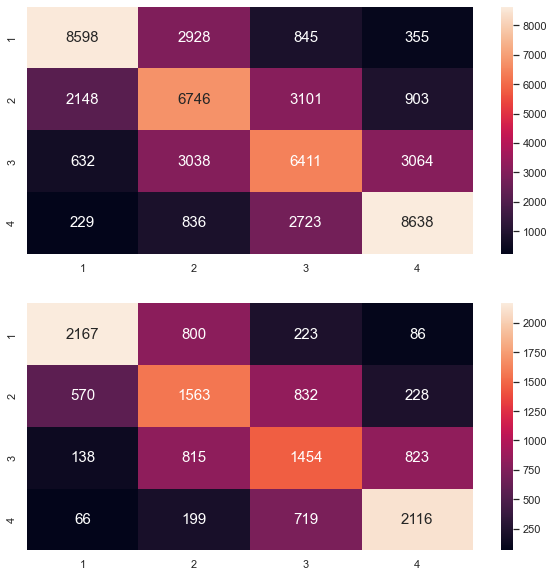

In [55]:
boostTree = xgb.XGBClassifier(n_estimators=500, subsample=0.7, max_depth=2, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Classifier with n_estimators: 500, subsample: 0.7, max_depth: 3</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.6347644785254443
F1 Score for Test Data: 0.5721465787073228


<AxesSubplot:>

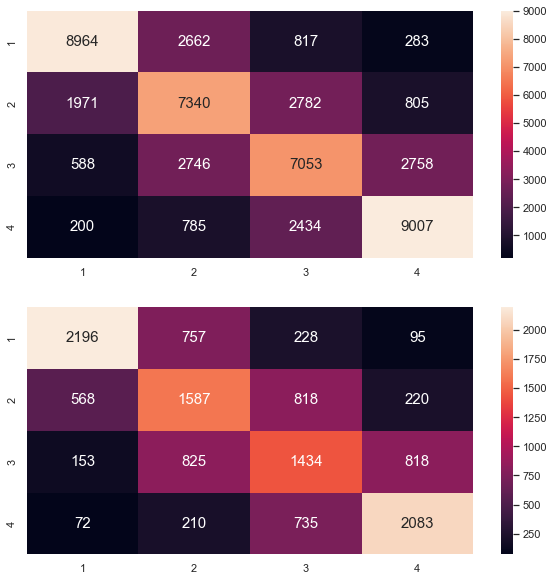

In [56]:
boostTree = xgb.XGBClassifier(n_estimators=500, subsample=0.7, max_depth=3, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Classifier with n_estimators: 500, subsample: 0.7, max_depth: 4</b>

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 Score for Train Data: 0.690432569909321
F1 Score for Test Data: 0.5696870883717828


<AxesSubplot:>

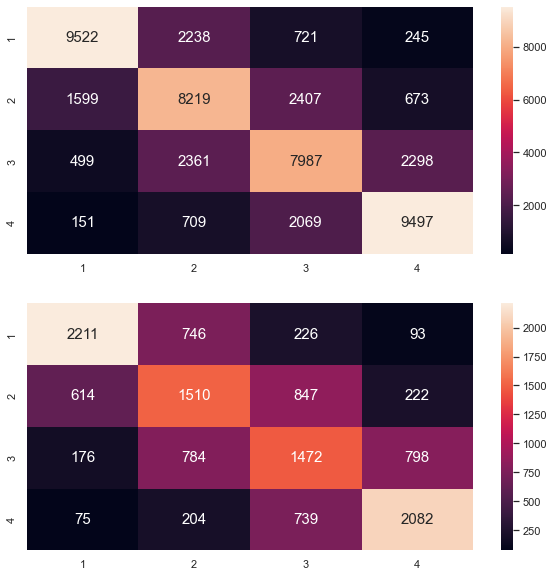

In [57]:
boostTree = xgb.XGBClassifier(n_estimators=500, subsample=0.7, max_depth=4, eval_metric='mlogloss')
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Insights from hyperparameters tuning</b>
<br>We see that as we increase the max_depth beyond 5, there starts to be overfitting. Hence, the optimal depth could be around 2-5.

<h3>Cross Validation</h3>

Similarly, we will use <b>GridSearchCV</b> to obtain the optimal hyperparameters through a 4-fold cross validation process.

<b>Importing the GridSearchCV function from sklearn</b>

In [ ]:
from sklearn.model_selection import GridSearchCV

<b>Obtaining optimal hyperparameters through cross validation</b>

In [58]:
hyperparams = {'n_estimators': [300,400,500],
               'subsample': [0.6, 0.7, 0.8],
               'max_depth': [x for x in range(2,6)]} #we found earlier that the optimal depth is around 2-5}
boostTree = GradientBoostingClassifier()

gridSearch = GridSearchCV(boostTree, hyperparams, cv=4, scoring='f1_macro')
gridSearch.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [300, 400, 500],
                         'subsample': [0.6, 0.7, 0.8]},
             scoring='f1_macro')

In [59]:
print('Optimal hyperparameter:', gridSearch.best_params_)
print('F1 score:', gridSearch.best_score_)

Optimal hyperparameter: {'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
F1 score: 0.5733240151283463


<h3>Optimal Model</h3>
<br>Based on the GridSearchCV results, we built the model with the optimal hyperparamters of max depth=3, n_estimators=500 and subsample=0.8

F1 Score for Train Data: 0.6159081036735705
F1 Score for Test Data: 0.574624174847602


<AxesSubplot:>

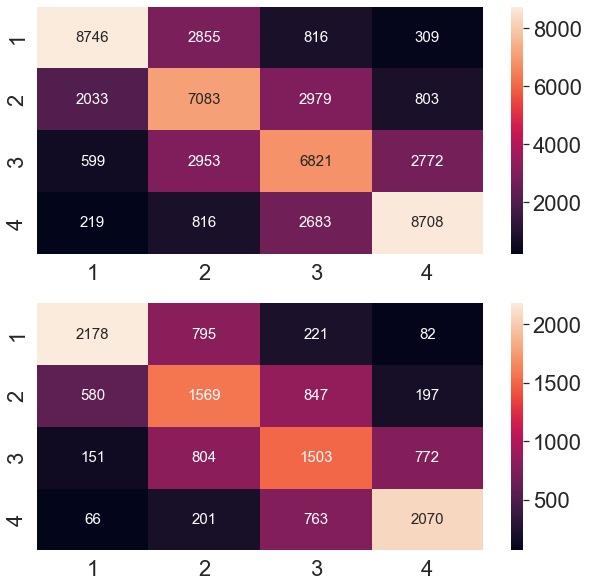

In [175]:
boostTree = GradientBoostingClassifier(n_estimators=500, subsample=0.8, max_depth=3)
boostTree.fit(x_train, y_train.values.ravel())

y_train_pred = boostTree.predict(x_train)
y_test_pred = boostTree.predict(x_test)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

                                Feature  Importance
14                Last Week Working Hrs    0.000894
5                             Cert_Need    0.001033
9                              Industry    0.001472
7                           Citizenship    0.004356
6                      Occupation Group    0.004974
8                                  Race    0.005985
17                              HrsWeek    0.006512
10                            WorkClass    0.008213
4                              Pro_Cert    0.008418
16                     Longest Industry    0.009272
19                            Education    0.011649
21  Less than 35hrs for at least 1 week    0.014703
1                               Veteran    0.017936
13            Detailed Household Status    0.020581
11                    Longest Job Class    0.027054
2                            Disability    0.037764
20                           Occupation    0.047183
15                                  Sex    0.076121
3           

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

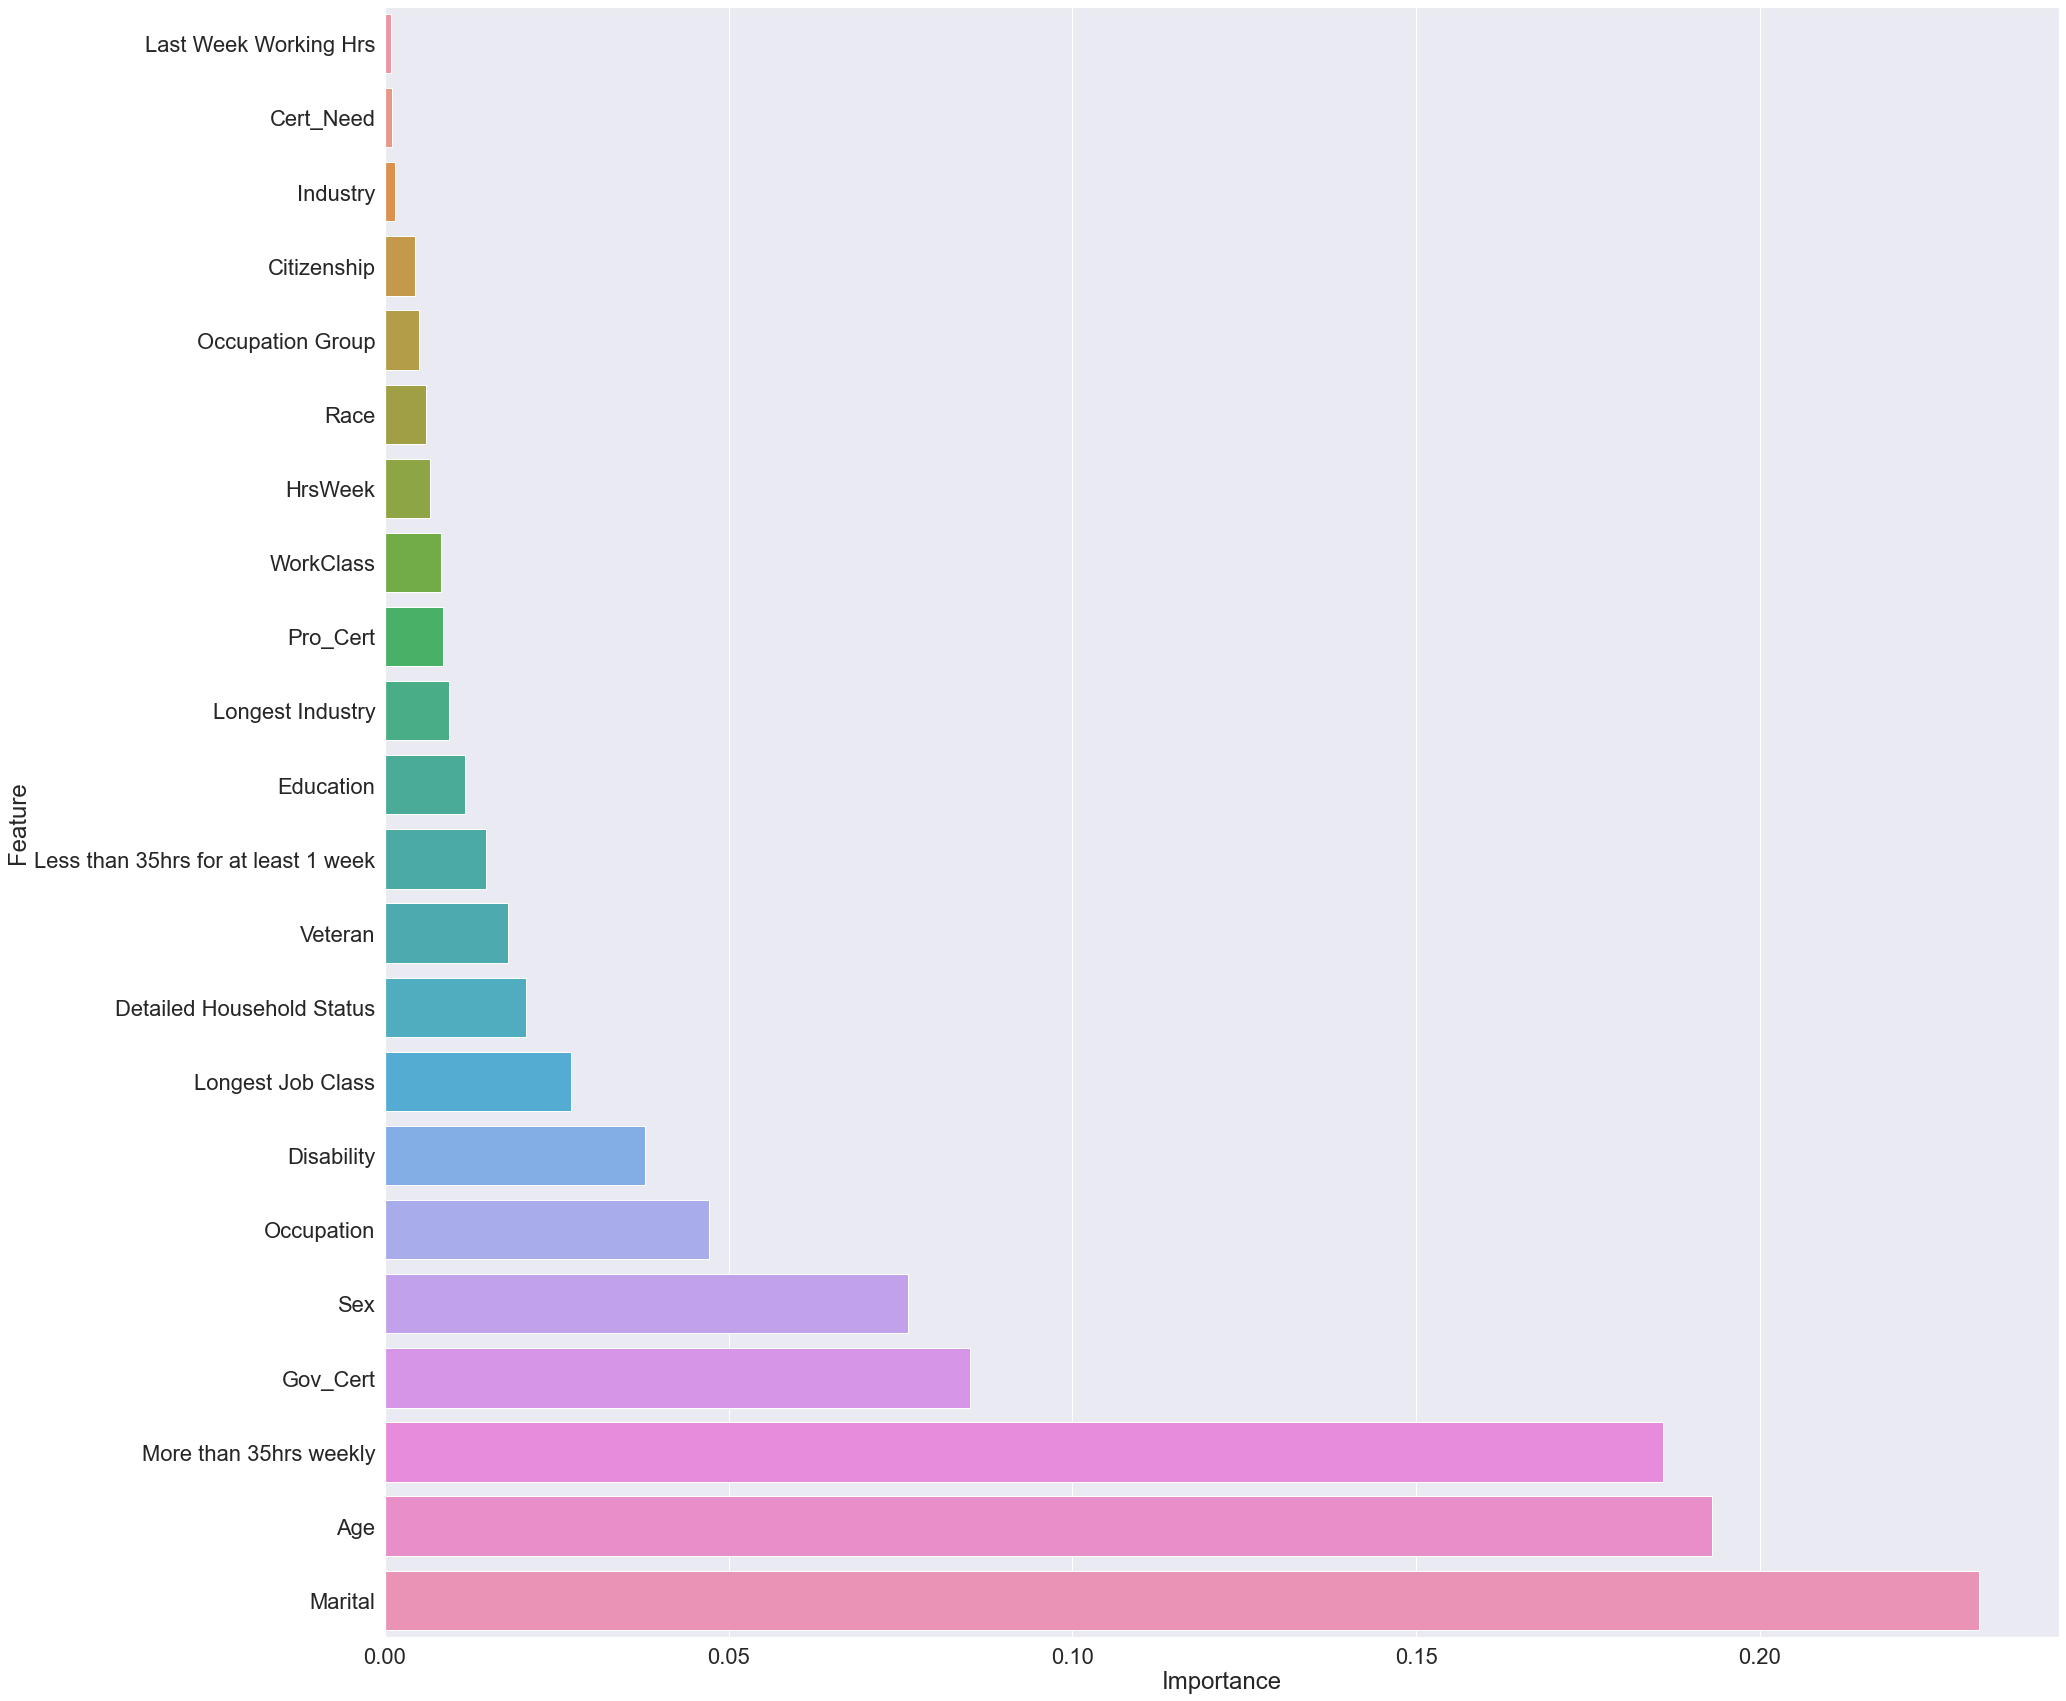

In [176]:
index = list(np.argsort(boostTree.feature_importances_))
xaxis = []
feature_importance = {}

featureDF = pd.DataFrame(columns=['Feature', 'Importance'])
for i in range(len(index)):
    col = x_train.columns[index[i]]
    importance = boostTree.feature_importances_.tolist()[i]
    featureDF = featureDF.append({'Feature':col, 'Importance':importance}, ignore_index=True)

featureDF = featureDF.sort_values(by='Importance')
print(featureDF)
fig, axes = plt.subplots(figsize=(30,30))
sb.barplot(y='Feature', x='Importance', data=featureDF, ax=axes)

<h3>Training model with engineered data</h3>
<br>We want to see if there will be an improvement in model performance if we utilise the feature engineered datasets.

<b>Importing of datasets</b>

In [177]:
x_trainEGIN = pd.read_csv('Data/x_trainEGIN.csv')
x_testEGIN = pd.read_csv('Data/x_testEGIN.csv')

F1 Score for Train Data: 0.616174850598371
F1 Score for Test Data: 0.5721406706888522


<AxesSubplot:>

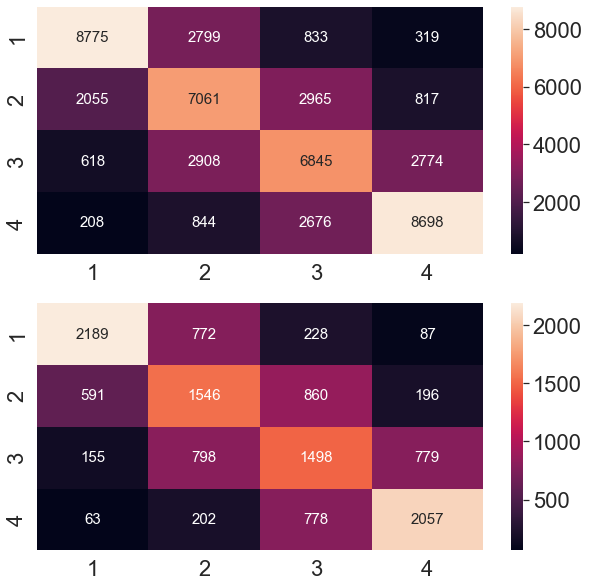

In [188]:
boostTree = GradientBoostingClassifier(n_estimators=500, subsample=0.8, max_depth=3)
boostTree.fit(x_trainEGIN, y_train.values.ravel())

y_train_pred = boostTree.predict(x_trainEGIN)
y_test_pred = boostTree.predict(x_testEGIN)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Tuning of hyperparameters</b>

F1 Score for Train Data: 0.6341587667426298
F1 Score for Test Data: 0.5760994904040242


<AxesSubplot:>

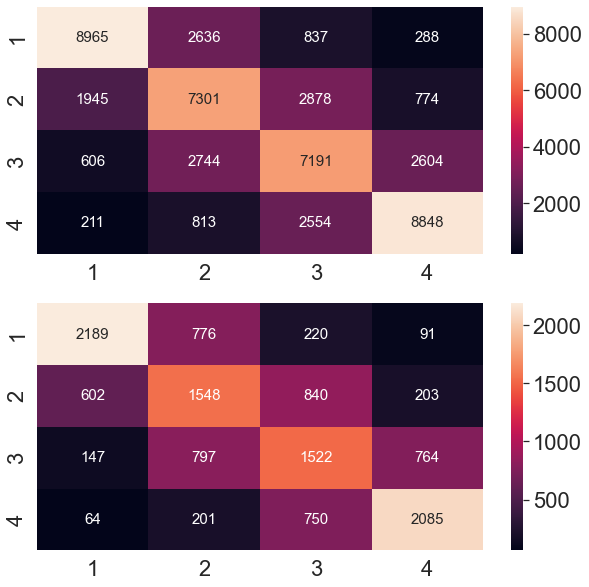

In [202]:
boostTree = GradientBoostingClassifier(n_estimators=300, subsample=0.7, max_depth=4)
boostTree.fit(x_trainEGIN, y_train.values.ravel())

y_train_pred = boostTree.predict(x_trainEGIN)
y_test_pred = boostTree.predict(x_testEGIN)

fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

                                Feature  Importance
12                Last Week Working Hrs    0.001202
7                             WorkClass    0.005295
5                           Citizenship    0.005549
6                                  Race    0.006001
15                              HrsWeek    0.008590
8                     Longest Job Class    0.010120
4                      Occupation Group    0.011812
17                            Education    0.012904
19  Less than 35hrs for at least 1 week    0.015998
14                     Longest Industry    0.016053
1                             Cert_Need    0.020621
11            Detailed Household Status    0.020640
9                              Industry    0.034797
2                              Pro_Cert    0.034869
18                           Occupation    0.049901
13                                  Sex    0.070812
3                              Gov_Cert    0.095179
0                More than 35hrs weekly    0.174719
16          

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

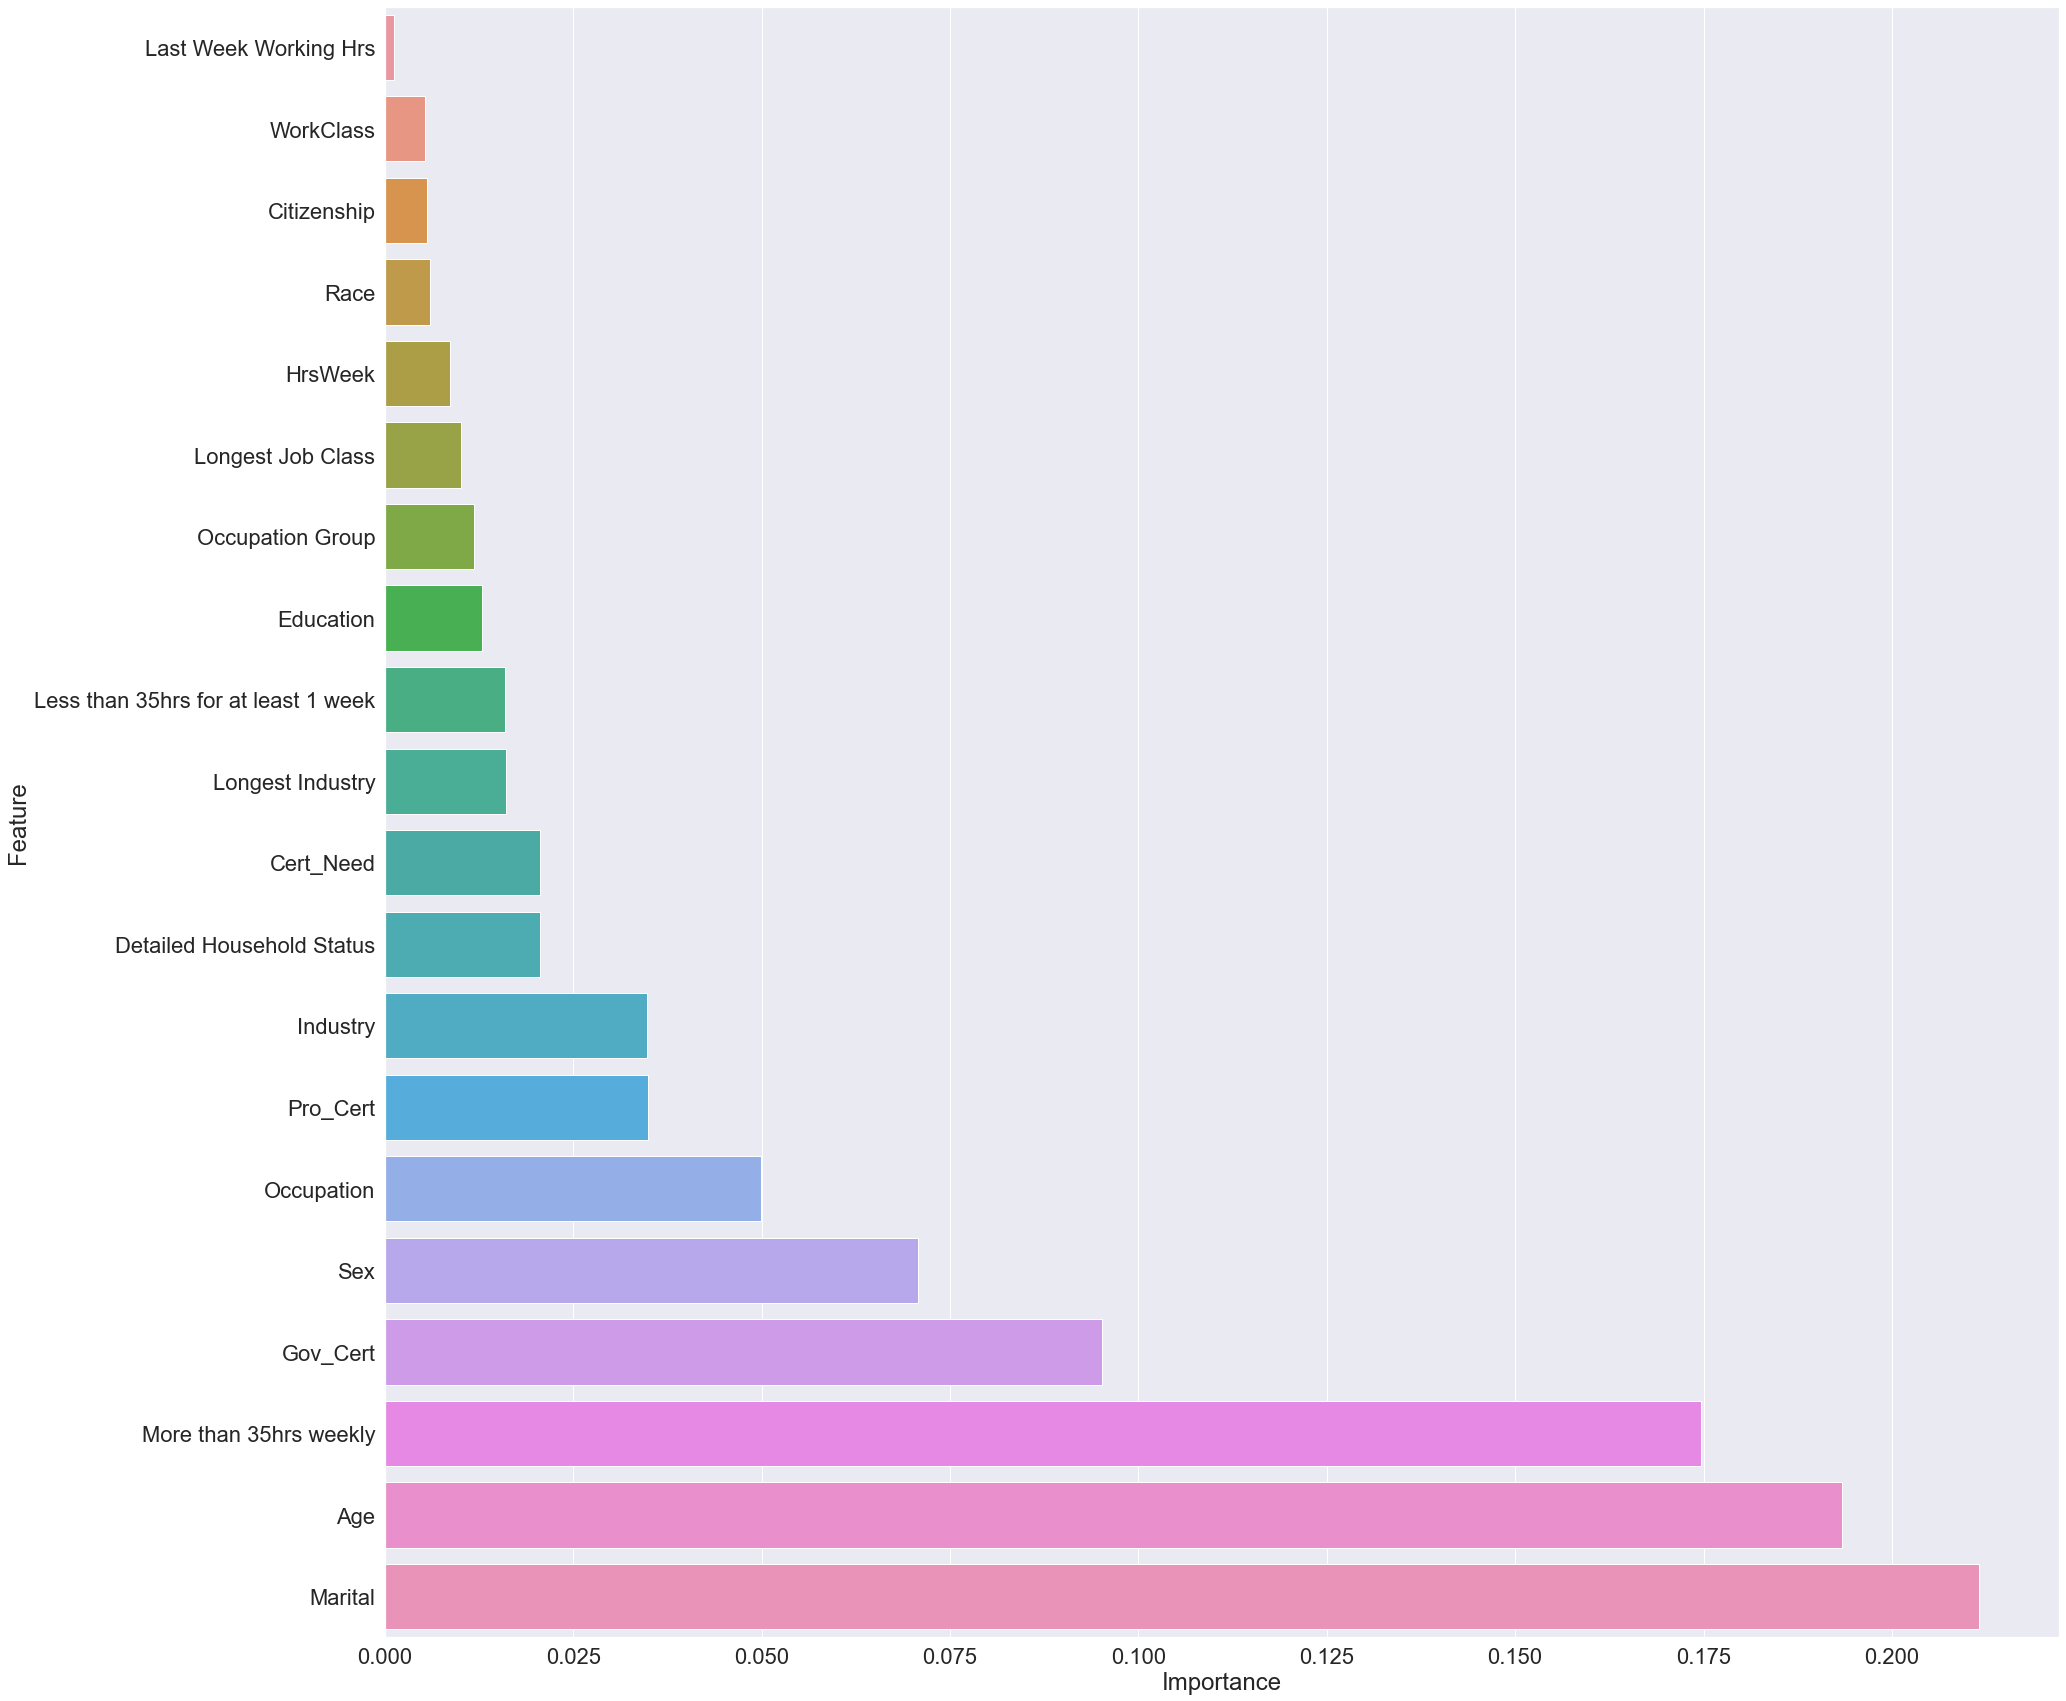

In [203]:
index = list(np.argsort(boostTree.feature_importances_))
xaxis = []
feature_importance = {}

featureDF = pd.DataFrame(columns=['Feature', 'Importance'])
for i in range(len(index)):
    col = x_trainEGIN.columns[index[i]]
    importance = boostTree.feature_importances_.tolist()[i]
    featureDF = featureDF.append({'Feature':col, 'Importance':importance}, ignore_index=True)

featureDF = featureDF.sort_values(by='Importance')
print(featureDF)
fig, axes = plt.subplots(figsize=(30,30))
sb.barplot(y='Feature', x='Importance', data=featureDF, ax=axes)

We see that the engineered data improves XGBoost performance slightly.

<b>Insights from this notebook</b>
<br>

- XGBoost performs much better than Decision Tree.
- The feature engineered data did improve XGBoost performance slightly.
- The mosr important features identified by XGBoost are Marital Status, Age, Whether you work more than 35 hours a week, Whether you have a government-issued Professional Certificate and Gender.